# Статистическое оценивание в библиотеке Scikit-Learn

1. Выбор модели и ее импорт.
2. Выбор гиперпараметров модели.
3. Формирование из данных матриц признаков и целевого вектора
4. Обучение модели. При помощи .fit()
5. Применение модели к новым данным: predict() или transform()

In [1]:
%matplotlib inline
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np

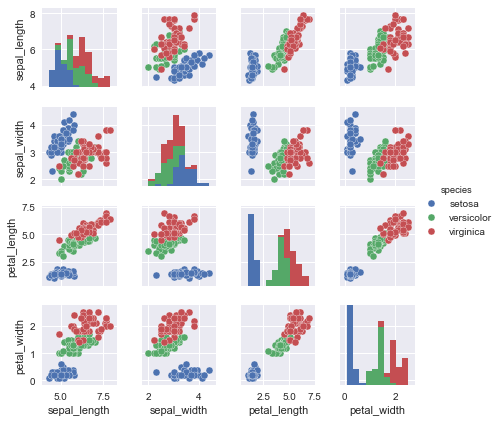

In [2]:
iris = sns.load_dataset('iris')
sns.pairplot(iris, hue = 'species', size = 1.5);

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
X_iris = iris.drop('species', axis = 1)
X_iris.shape

(150, 4)

In [5]:
y_iris = iris['species']
y_iris.shape

(150,)

# Пример обучения с учителем: Простая линейная регрессия

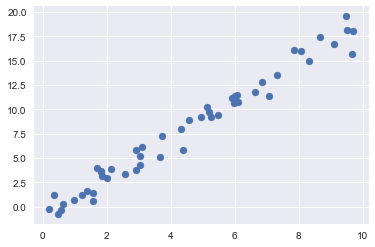

In [6]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

1 - Выбор класса модели:

In [8]:
from sklearn.linear_model import LinearRegression

 2 - Выбор гиперпараметров:

In [11]:
model = LinearRegression(fit_intercept = True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

3 - Формируем из данных матрицы признаков и целевого вектора:

In [12]:
X = x[:, np.newaxis]
X.shape

(50, 1)

4 - Обучение модели:

In [13]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Угловой коэффициент:

In [14]:
model.coef_

array([1.9776566])

Точка пересечения с осью координат:

In [15]:
model.intercept_

-0.9033107255311164

5 - Предсказание меток для новых данных:

In [18]:
xfit = np.linspace(-1, 11)

In [21]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

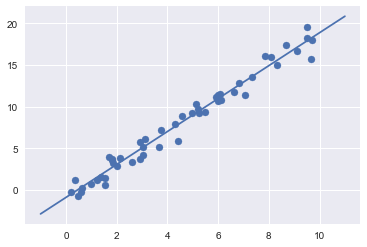

In [23]:
plt.scatter(X, y)
plt.plot(Xfit, yfit);

# Пример обучения с учителем: Классификая

In [21]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, test_size=0.3, random_state=1)

In [22]:
ytrain.shape, ytest.shape, Xtrain.shape, Xtest.shape

((105,), (45,), (105, 4), (45, 4))

In [23]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [25]:
model.fit(Xtrain, ytrain)

GaussianNB(priors=None)

In [26]:
y_model = model.predict(Xtest)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9333333333333333